# 9. Unsupervised Learning Techniques

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter09/chapter09.ipynb)


오늘날 머신러닝의 대부분 응용은 지도학습 기반이며 대부분의 투자 집중  
하지만 사용 가능한 데이터의 절대 다수는 레이블이 없음  
(입력 특성 X는 있지만 레이블 y는 없음)  
Yann LeCun: “지능이 케이크라면 비지도 학습은 케이크 본체, 감독 학습은 케이크 위 아이싱, 강화 학습은 체리”  
-> 비지도 학습에는 아직 제대로 활용되지 않은 막대한 가능성이 존재

예를 들어 제조 라인의 각 품목 사진을 몇 장 찍고 결함 여부를 판단하는 시스템을 만들고 싶다고 가정  
자동으로 사진을 찍는 시스템은 쉽게 만들 수 있으며, 하루에 수천 장의 사진이 생성될 수 있음  
몇 주 만에 상당한 양의 데이터셋 구축 가능하나 문제는 레이블이 없다는 점  
결함 여부를 예측하는 일반적인 이진 분류기를 학습하려면 모든 사진에 ‘결함’, ‘정상’ 레이블을 붙여야 함  
이 작업은 보통 사람이 직접 사진을 보고 수작업으로 수행해야 하며, 이는 오래 걸리고 비용이 많이 드는 지루한 작업  
결국 전체 사진 중 일부만 라벨링되며, 결과적으로 라벨링된 데이터셋은 작고 분류기의 성능은 실망스러움  
제품에 조금이라도 변화가 생기면 전체 과정을 처음부터 다시 시작해야 함  
사람이 모든 사진에 라벨을 붙이지 않아도 알고리즘이 비라벨 데이터를 활용할 수 있다면? -> **비지도 학습**

- **클러스터링**  
유사한 샘플을 하나의 군집으로 묶는 것이 목표  
데이터 분석, 고객 세분화, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등 다양한 분야에 유용

- **이상치 탐지**  
정상 데이터가 어떤 모습인지를 학습한 뒤, 이를 바탕으로 이상 사례를 탐지하는 것이 목표  
예: 제조 라인에서 결함 제품 탐지, 시계열에서 새로운 트렌드 감지

- **밀도 추정**  
데이터셋을 생성한 확률 과정의 확률 밀도 함수(PDF)를 추정하는 과제  
밀도 추정은 이상치 탐지에 자주 사용됨  
매우 낮은 밀도 영역에 위치한 샘플은 이상치일 가능성 높음  
또한 데이터 분석과 시각화에도 유용  


In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Clustering

[클러스터링]  
산을 등산하던 중 이전에 본 적 없는 식물들을 우연히 발견하여   
완전히 동일하지는 않지만 충분히 유사하여 같은 종(또는 최소한 같은 속)에 속한다고 판단 가능  
어떤 종인지 정확히 알려면 식물학자의 도움 필요  
유사한 생물체를 묶는 일은 전문가가 아니어도 가능  
=> 유사한 개체를 식별하고 클러스터(즉, 유사한 개체들의 집단)에 할당하는 작업  

분류와 마찬가지로 각 개체는 어떤 그룹에 할당됨
분류와 달리 클러스터링은 비지도 학습


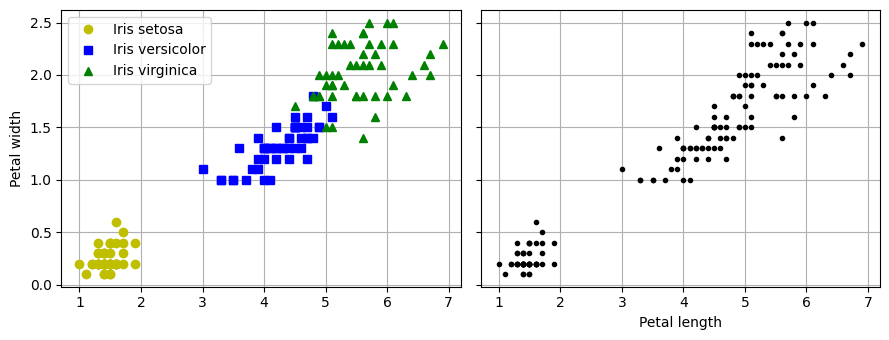

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")  # Iris setosa: 노란 점
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")  # Iris versicolor: 파란 사각형
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")  # Iris virginica: 초록 삼각형
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")  # 클래스 정보를 제거한 상태로 모든 샘플을 검정 점으로 표시
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

save_fig("classification_vs_clustering_plot")  # 분류와 클러스터링 비교 그림 저장
plt.show()


- 왼쪽  
아이리스 데이터셋  
각 개체의 종(클래스)이 다른 마커로 표시된 라벨 있음  
로지스틱 회귀, SVM, 랜덤 포레스트 분류기 같은 분류 알고리즘이 적합
  
- 오른쪽  
동일한 데이터셋에서 라벨 제거  
분류 알고리즘 사용 불가 -> 클러스터링 알고리즘 사용

이 데이터셋에는 시각화에 나타나지 않은 두 개의 추가 특징 있음: 꽃받침의 길이, 너비  

클러스터링 알고리즘은 **모든 특성(feature)** 활용 가능  
 **가우시안 혼합 모델(Gaussian Mixture Model)** 등을 사용하면
150개 중 단 5개만 잘못된 클러스터에 할당될 정도로
세 개의 클러스터를 꽤 정확하게 식별 가능

### K-Means

### Limits of K-Means

### Using Clustering for Image Segmentation

### Using Clustering for Preprocessing

### Using Clustering for Semi-Supervised Learning

### DBSCAN

### Other Clustering Algorithms

## Gaussian Mixtures

### Anomaly Detection Using Gaussian Mixtures

### Selecting the Number of Clusters

### Bayesian Gaussian Mixture Models

### Other Algorithms for Anomaly and Novelty Detection